In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("Korea.csv")


In [4]:
data.head()

,ID,여행일수,제주,경남,경북,전남,전북,충남,충북,강원,...,재방문 의도,타인 추천 의도,성별,연령,가구원수,가구 월소득,봄,여름,가을,겨울
0,22020520011_1229732,1,0,0,3,0,1,0,0,0,...,4.0,3.0,0,4,3,8,0,1,0,0
1,11090711981_1129310,1,0,0,0,0,0,0,0,1,...,4.0,4.0,0,6,4,6,1,0,0,0
2,2503073057A_1070957,0,0,0,0,0,1,2,0,0,...,4.0,4.0,0,2,3,6,1,0,0,0
3,26030550451_1334180,1,1,1,0,0,0,0,0,0,...,4.0,4.0,1,5,4,5,0,0,1,0
4,11080630451_1223531,2,0,0,0,1,0,0,0,1,...,4.0,3.0,1,4,3,6,0,1,0,0


In [5]:
JEJU = pd.DataFrame() 
KYUNG_S = pd.DataFrame()
KYUNG_N = pd.DataFrame()
JEON_S = pd.DataFrame()
JEON_N = pd.DataFrame()
CHOONG_S = pd.DataFrame()
CHOONG_N = pd.DataFrame()
GANGWON = pd.DataFrame()
KYUNGGI = pd.DataFrame()
SEJONG = pd.DataFrame()
ULSAN = pd.DataFrame()
DAEJEON = pd.DataFrame()
GWANGJU = pd.DataFrame()
INCHEON = pd.DataFrame()
DAEGU = pd.DataFrame()
BUSAN = pd.DataFrame()
SEOUL = pd.DataFrame()

In [6]:
JEJU = data.loc[data['제주']== 1]
KYUNG_S = data.loc[data['경남']== 1]
KYUNG_N = data.loc[data['경북']== 1]
JEON_S = data.loc[data['전남']== 1]
JEON_N = data.loc[data['전북']== 1]
CHOONG_S = data.loc[data['충남']== 1]
CHOONG_N = data.loc[data['충북']== 1]
GANGWON = data.loc[data['강원']== 1]
KYUNGGI = data.loc[data['경기']== 1]
SEJONG = data.loc[data['세종']== 1]
ULSAN = data.loc[data['울산']== 1]
DAEJEON = data.loc[data['대전']== 1]
GWANGJU = data.loc[data['광주']== 1]
INCHEON = data.loc[data['인천']== 1]
DAEGU = data.loc[data['대구']== 1]
BUSAN = data.loc[data['부산']== 1]
SEOUL = data.loc[data['서울']== 1]

In [7]:
SEOUL.columns

Index(['ID', '여행일수', '제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기',
       '세종', '울산', '대전', '광주', '인천', '대구', '부산', '서울', '여행 총 경비', '숙박비', '식사비',
       '교통비', '활동비', '쇼핑비', '수상스키 비용', '캠핑비', '등산비', '낚시비', '의상비', '배낭비',
       '여행지 선택이유', '만족도', '재방문 의도', '타인 추천 의도', '성별', '연령', '가구원수', '가구 월소득',
       '봄', '여름', '가을', '겨울'],
      dtype='object')

In [8]:
seoul = SEOUL['만족도']+SEOUL['재방문 의도']+SEOUL['타인 추천 의도']
busan = BUSAN['만족도']+BUSAN['재방문 의도']+BUSAN['타인 추천 의도']
daegu = DAEGU['만족도']+DAEGU['재방문 의도']+DAEGU['타인 추천 의도']
incheon = INCHEON['만족도']+INCHEON['재방문 의도']+INCHEON['타인 추천 의도']
gwangju = GWANGJU['만족도']+GWANGJU['재방문 의도']+GWANGJU['타인 추천 의도']
daejeon = DAEJEON['만족도']+DAEJEON['재방문 의도']+DAEJEON['타인 추천 의도']
ulsan = ULSAN['만족도']+ULSAN['재방문 의도']+ULSAN['타인 추천 의도']
sejong = SEJONG['만족도']+SEJONG['재방문 의도']+SEJONG['타인 추천 의도']
kyunggi = KYUNGGI['만족도']+KYUNGGI['재방문 의도']+KYUNGGI['타인 추천 의도']
gangwon = GANGWON['만족도']+GANGWON['재방문 의도']+GANGWON['타인 추천 의도']
choong_n = CHOONG_N['만족도']+CHOONG_N['재방문 의도']+CHOONG_N['타인 추천 의도']
choong_s = CHOONG_S['만족도']+CHOONG_S['재방문 의도']+CHOONG_S['타인 추천 의도']
jeon_n = JEON_N['만족도']+JEON_N['재방문 의도']+JEON_N['타인 추천 의도']
jeon_s = JEON_S['만족도']+JEON_S['재방문 의도']+JEON_S['타인 추천 의도']
kyung_n = KYUNG_N['만족도']+KYUNG_N['재방문 의도']+KYUNG_N['타인 추천 의도']
kyung_s = KYUNG_S['만족도']+KYUNG_S['재방문 의도']+KYUNG_S['타인 추천 의도']
jeju = JEJU['만족도']+JEJU['재방문 의도']+JEJU['타인 추천 의도']

In [9]:
GANGWON.head()

,ID,여행일수,제주,경남,경북,전남,전북,충남,충북,강원,...,재방문 의도,타인 추천 의도,성별,연령,가구원수,가구 월소득,봄,여름,가을,겨울
1,11090711981_1129310,1,0,0,0,0,0,0,0,1,...,4.0,4.0,0,6,4,6,1,0,0,0
4,11080630451_1223531,2,0,0,0,1,0,0,0,1,...,4.0,3.0,1,4,3,6,0,1,0,0
16,1109073081A_1129374,0,0,0,0,0,0,0,0,1,...,4.0,4.0,0,5,3,6,1,0,0,0
18,1109073081A_1129439,0,0,0,0,0,0,0,0,1,...,4.0,4.0,1,4,4,6,1,0,0,0
19,1109073081A_1129461,0,0,0,0,0,0,0,0,1,...,4.0,4.0,1,3,4,5,1,0,0,0


In [10]:
cols=GANGWON.columns.tolist()
#correlation, pvalue) 순서
for v in cols:
  if stats.spearmanr(GANGWON[v],gangwon)[1]>=0.5:
    print(v, stats.spearmanr(GANGWON[v],gangwon)[1])

제주 0.8129330610504752
전남 0.9238790583900678
전북 0.7968231154197206
충남 0.5156265864831158
충북 0.6692714580621192
경기 0.7615685121076912
울산 0.8129330610504752
광주 0.8129330610504752
인천 0.7085206260581232
부산 0.5950650407551412
캠핑비 0.5769809215299293
등산비 0.6993347152107865
낚시비 0.7135081036198961
성별 0.5750594621945813


c:\Users\ros43\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
c:\Users\ros43\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


(1000.0, 250000.0)

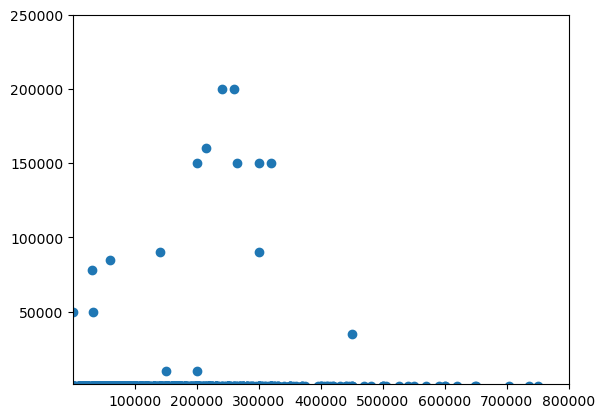

In [45]:

plt.scatter(GANGWON['식사비'],GANGWON['등산비'])
plt.xlim([1,800000])
plt.ylim([1000,250000])

(1000.0, 300000.0)

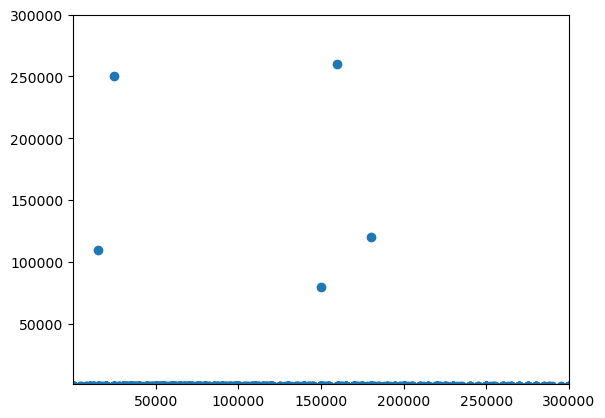

In [47]:
plt.scatter(GANGWON['식사비'],GANGWON['캠핑비'])
plt.xlim([1,300000])
plt.ylim([1000,300000])

(1000.0, 400000.0)

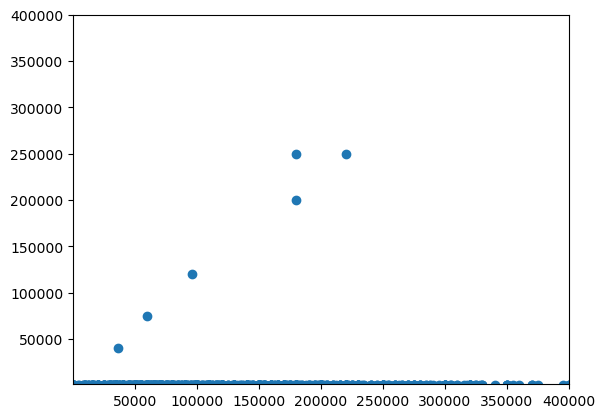

In [52]:
plt.scatter(GANGWON['식사비'],GANGWON['낚시비'])
plt.xlim([1,400000])
plt.ylim([1000,400000])